# DATA CLEANING PROCESS

In [1]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import psycopg2

# customer_data

In [2]:
import pandas as pd

# Full path to the file
customer_data = pd.read_csv(r"C:\project\Customers.csv", encoding='latin1')

In [3]:
customer_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [4]:
#check data types
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


# Convert to datetime and then format to 'YY/MM/DD'

In [5]:
customer_data['Birthday'] = pd.to_datetime(customer_data['Birthday'], format="%m/%d/%Y", errors='coerce').dt.date

In [6]:
customer_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


# check missing values

In [7]:
customer_data.dropna(inplace=True)

In [8]:
customer_data.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [9]:
customer_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


Text(0.5, 1.0, 'counts as per Country')

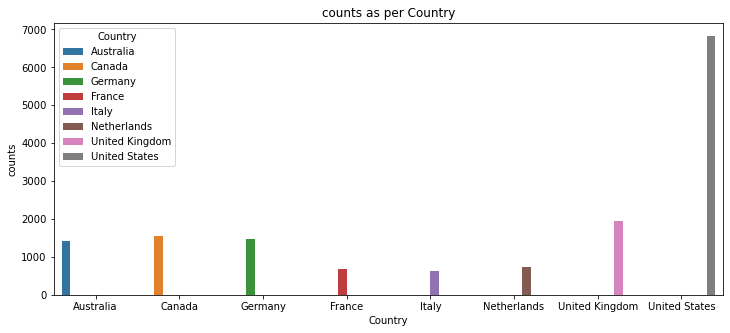

In [10]:
# visualize country counts
plt.figure(figsize=(12,5))
sns.countplot(x=customer_data["Country"], data=customer_data, hue ='Country')
plt.xlabel("Country")
plt.ylabel("counts")
plt.title("counts as per Country")

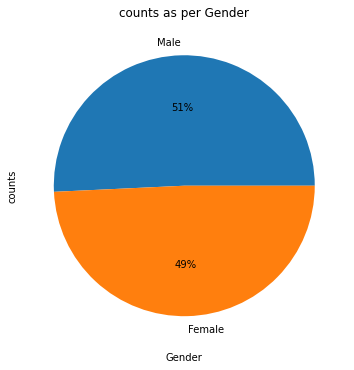

In [11]:
# visualize gender details
plt.figure(figsize=(12,6))
plt.pie(customer_data["Gender"].value_counts(),autopct='%1.0f%%',labels=['Male', 'Female'])
plt.xlabel("Gender")
plt.ylabel("counts")
plt.title("counts as per Gender")
plt.show()

# SALES_DATA

In [12]:
import pandas as pd

# Full path to the file
sales_data = pd.read_csv(r"C:\project\Sales.csv", encoding='latin1')

In [13]:
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [14]:
#check data types
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


# check missing values

In [15]:
sales_data.dropna(inplace=True)

In [16]:
sales_data.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

# Convert to datetime and then format to 'YY/MM/DD'

In [17]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [18]:
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD
5,366002,3,2016-01-01,1/12/2016,266019,0,1080,4,CAD
...,...,...,...,...,...,...,...,...,...
62878,2243029,6,2021-02-20,2/27/2021,887764,0,1456,2,EUR
62880,2243031,1,2021-02-20,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2/23/2021,331277,0,1717,2,CAD


In [19]:
# fill the missing values
sales_data["Delivery Date"]=sales_data["Delivery Date"].fillna(0)

In [20]:
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD
5,366002,3,2016-01-01,1/12/2016,266019,0,1080,4,CAD
...,...,...,...,...,...,...,...,...,...
62878,2243029,6,2021-02-20,2/27/2021,887764,0,1456,2,EUR
62880,2243031,1,2021-02-20,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2/23/2021,331277,0,1717,2,CAD


Text(0.5, 1.0, 'counts as per Currency Code')

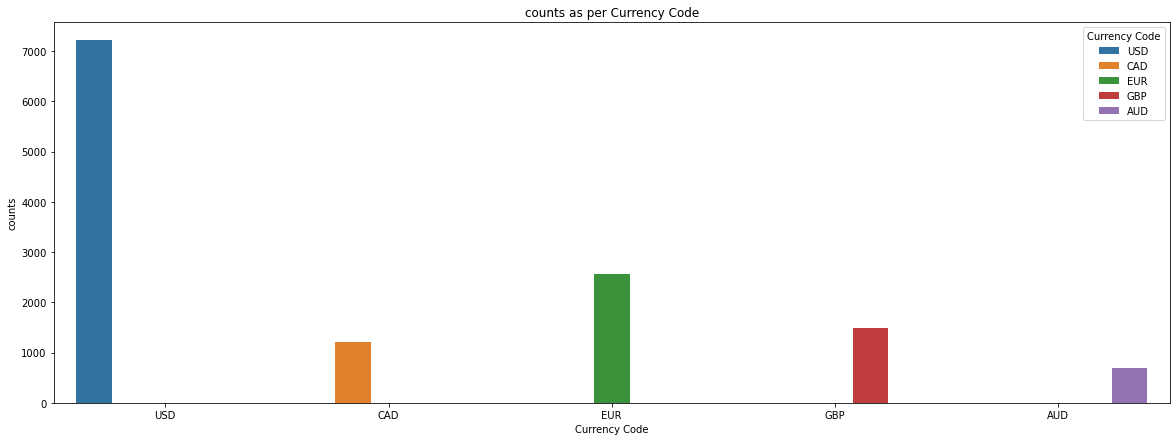

In [21]:
# visualize currency counts
plt.figure(figsize=(20,7))
sns.countplot(x=sales_data["Currency Code"], data=sales_data, hue ='Currency Code')
plt.xlabel("Currency Code")
plt.ylabel("counts")
plt.title("counts as per Currency Code")

# Products_data

In [22]:
import pandas as pd

# Full path to the file
products_data = pd.read_csv(r"C:\project\Products.csv", encoding='latin1')

In [23]:
products_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [24]:
#check data types
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


# check missing values

In [25]:
products_data.dropna(inplace=True)

In [26]:
# check missing values
products_data.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

# Convert usd into normal price

In [27]:
products_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [28]:
product_labels = products_data["Brand"].value_counts().index

In [29]:
product_labels

Index(['Contoso', 'Fabrikam', 'Litware', 'Proseware', 'Adventure Works',
       'Southridge Video', 'Wide World Importers', 'The Phone Company',
       'Tailspin Toys', 'A. Datum', 'Northwind Traders'],
      dtype='object')

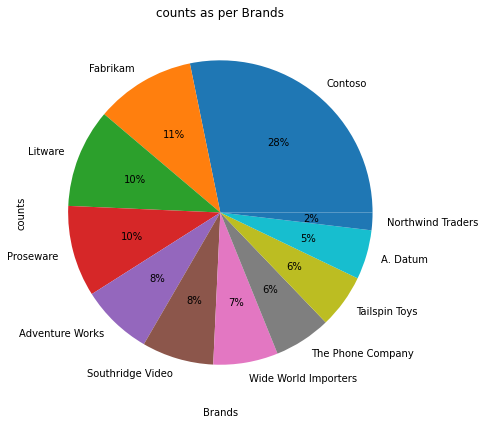

In [30]:
# visualize gender details
plt.figure(figsize=(12,7))
plt.pie(products_data["Brand"].value_counts(),autopct='%1.0f%%',labels=product_labels)
plt.xlabel("Brands")
plt.ylabel("counts")
plt.title("counts as per Brands")
plt.show()

Text(0.5, 1.0, 'counts as per Category')

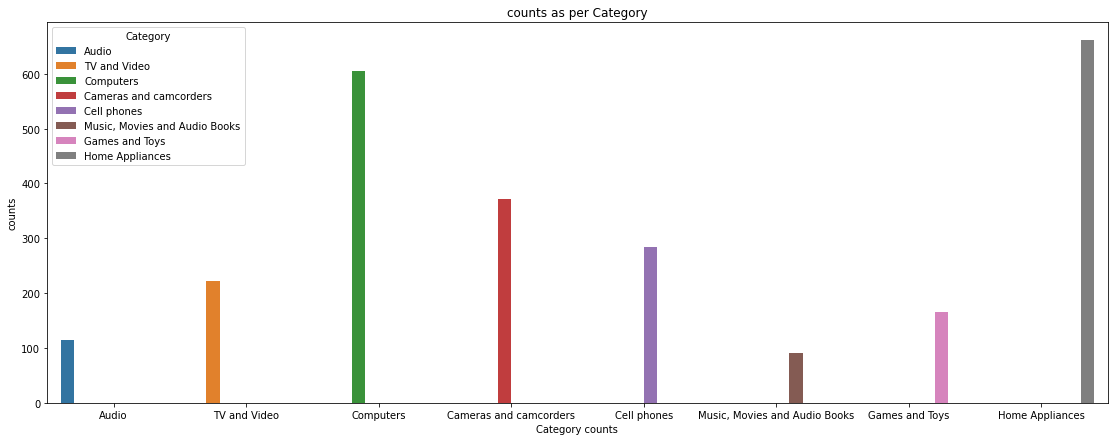

In [31]:
# visualize category counts
plt.figure(figsize=(19,7))
sns.countplot( x = products_data["Category"], data = products_data, hue ='Category')
plt.xlabel("Category counts")
plt.ylabel("counts")
plt.title("counts as per Category")

# STORES_DATA

In [32]:
import pandas as pd

# Full path to the file
stores_data = pd.read_csv(r"C:\project\Stores.csv", encoding='latin1')

In [33]:
stores_data

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [34]:
#check data types
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


# check missing values

In [35]:
stores_data.dropna(inplace=True)

In [36]:
# check missing values
stores_data.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

# Convert to datetime and then format to 'YY/MM/DD'

In [37]:
stores_data['Open Date'] = pd.to_datetime(stores_data['Open Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [38]:
stores_data

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
61,62,United States,South Dakota,1120.0,2018-06-03
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01


In [39]:
stores_data.tail()

,StoreKey,Country,State,Square Meters,Open Date
61,62,United States,South Dakota,1120.0,2018-06-03
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [40]:
# fill the missing values
stores_data["Square Meters"]=stores_data["Square Meters"].fillna(0)

In [41]:
stores_data.tail()

,StoreKey,Country,State,Square Meters,Open Date
61,62,United States,South Dakota,1120.0,2018-06-03
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [42]:
store_labels = stores_data["State"].value_counts().index

# Exchange_rates_data

In [43]:
import pandas as pd

# Full path to the file
Exchange_rates_data = pd.read_csv(r"C:\project\Exchange_Rates.csv", encoding='latin1')

In [44]:
Exchange_rates_data

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [45]:
Exchange_rates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


# check missing values

In [46]:
Exchange_rates_data.dropna(inplace=True)

In [47]:
# check missing values
Exchange_rates_data.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [48]:
# rename the column and convert the date format
Exchange_rates_data.rename(columns={"Currency":"Currency Code"},inplace=True)
Exchange_rates_data['Date'] = pd.to_datetime(Exchange_rates_data['Date'], format="%m/%d/%Y", errors='coerce')

In [49]:
Exchange_rates_data

,Date,Currency Code,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


In [50]:
exchange_labels = Exchange_rates_data['Currency Code'].value_counts().index

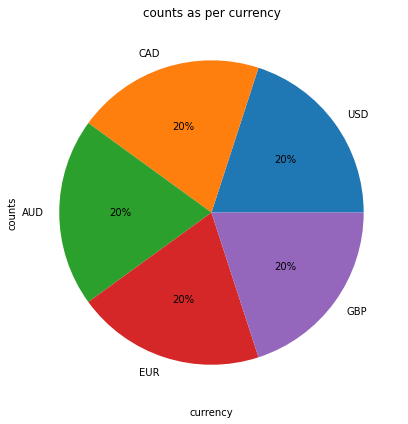

In [51]:
# visualize currency details
plt.figure(figsize=(12,7))
plt.pie(Exchange_rates_data['Currency Code'].value_counts(),autopct='%1.0f%%',labels=exchange_labels)
plt.xlabel("currency")
plt.ylabel("counts")
plt.title("counts as per currency")
plt.show()

# Create the sql database

In [52]:
import psycopg2
from psycopg2 import sql

# Connect to the PostgreSQL server (no specific database required for creation)
conn = psycopg2.connect(
    host="localhost",
    user="postgres",  # Replace with your PostgreSQL username
    password="harish26"   # Replace with your PostgreSQL password
)

# Set autocommit to True to execute CREATE DATABASE outside a transaction block
conn.autocommit = True

# Create a cursor object
cur = conn.cursor()

# Create the database if it doesn't exist
database_name = "customer_sales"
cur.execute(
    sql.SQL("SELECT 1 FROM pg_database WHERE datname = %s"),
    [database_name]
)
if not cur.fetchone():
    cur.execute(sql.SQL("CREATE DATABASE {}").format(sql.Identifier(database_name)))
    print("Database created successfully")
else:
    print("Database already exists")

# Close the cursor and connection
cur.close()
conn.close()

Database already exists


# sales table creation

In [53]:
import psycopg2

# Connect to the PostgreSQL server (replace with your credentials)
conn = psycopg2.connect(
    host="localhost",
    database="customer_sales",  # Specify the database where the table will be created
    user="postgres",            # Replace with your PostgreSQL username
    password="harish26"         # Replace with your PostgreSQL password
)

# Create a cursor object
cur = conn.cursor()

# SQL query to create the table if it doesn't exist
create_table_query = '''
    CREATE TABLE IF NOT EXISTS sales_data (
        Order_Number INT,
        Line_Item INT,
        Order_Date DATE,
        Delivery_Date VARCHAR(255),
        CustomerKey INT,
        StoreKey INT,
        ProductKey INT,
        Quantity INT,
        Currency_Code VARCHAR(255)
    )
'''

# Execute the query
cur.execute(create_table_query)
print("Table created successfully")

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

Table created successfully


In [54]:
import psycopg2
import pandas as pd

# Assuming sales_data is your actual DataFrame with all 62,884 rows
# Ensure sales_data is not empty and has the correct data
print(f"Number of rows in sales_data (before insertion): {len(sales_data)}")

# Remove duplicates if necessary
sales_data = sales_data.drop_duplicates()

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="customer_sales",  # Replace with your actual database name
    user="postgres",            # Replace with your PostgreSQL username
    password="harish26"         # Replace with your PostgreSQL password
)

# Create a cursor object
my_cursor = conn.cursor()

# SQL query to insert data into sales_data table
insert_query = '''
INSERT INTO sales_data (
    Order_Number, Line_Item, Order_Date, Delivery_Date,
    CustomerKey, StoreKey, ProductKey, Quantity, Currency_Code
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
'''

# Convert the DataFrame into a list of tuples for insertion
data = sales_data.values.tolist()

# Check the number of rows before insertion
my_cursor.execute("SELECT COUNT(*) FROM sales_data")
rows_before = my_cursor.fetchone()[0]
print(f"Rows before insertion: {rows_before}")

# Execute the insertion using executemany to insert multiple rows
try:
    my_cursor.executemany(insert_query, data)
    conn.commit()
    print("Inserted all rows successfully")
except Exception as e:
    conn.rollback()  # Roll back the transaction if an error occurs
    print(f"Error occurred: {e}")

# Check the number of rows after insertion
my_cursor.execute("SELECT COUNT(*) FROM sales_data")
rows_after = my_cursor.fetchone()[0]
print(f"Rows after insertion: {rows_after}")

# Close the cursor and connection
my_cursor.close()
conn.close()

Number of rows in sales_data (before insertion): 13165
Rows before insertion: 13165
Inserted all rows successfully
Rows after insertion: 26330


# customer table creation

In [55]:
import psycopg2

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    user="postgres",      # Your PostgreSQL username
    password="harish26",  # Your PostgreSQL password
    dbname="customer_sales"  # Database to use
)

# Create a cursor object using the connection to execute the query
with conn.cursor() as cur:
    # SQL query to create a table
    cur.execute('''
        CREATE TABLE IF NOT EXISTS customer_data (
            CustomerKey INT,
            Gender VARCHAR(255),
            Name VARCHAR(255),
            City VARCHAR(255),
            State_Code VARCHAR(255),
            State VARCHAR(255),
            Zip_Code VARCHAR(255),
            Country VARCHAR(255),
            Continent VARCHAR(255),
            Birthday DATE
        )
    ''')

    # Commit the transaction (though for DDL commands like CREATE TABLE, commit is implicit)
    conn.commit()

    print("Table 'customer_data' created successfully")

# Close the connection
conn.close()

Table 'customer_data' created successfully


In [56]:
import psycopg2

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    user="postgres",      # Your PostgreSQL username
    password="harish26",  # Your PostgreSQL password
    dbname="customer_sales"  # Database to use
)

# Assuming customer_data is a pandas DataFrame
# Replace customer_data.values.tolist() with actual data if it's not from pandas
data = customer_data.values.tolist()

# Using a 'with' block for the cursor, so it is automatically managed and closed
with conn.cursor() as cur:
    # SQL query to insert data into customer_data table
    insert_query = '''INSERT INTO customer_data(
                          CustomerKey,
                          Gender,
                          Name,
                          City,
                          State_Code,
                          State,
                          Zip_Code,
                          Country,
                          Continent,
                          Birthday)
                      VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'''

    # Insert multiple rows using executemany
    cur.executemany(insert_query, data)

    # Commit the transaction (commits changes to the database)
    conn.commit()

    print("Inserted successfully")

# Close the connection
conn.close()

Inserted successfully


# Product Table creation

In [57]:
import psycopg2

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    user="postgres",      # Your PostgreSQL username
    password="harish26",  # Your PostgreSQL password
    dbname="customer_sales"  # Database to use
)

# Using a 'with' block for the cursor, so it is automatically managed and closed
with conn.cursor() as cur:
    # SQL query to create the table
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS product_data (
            ProductKey INT,
            Product_Name VARCHAR(255),
            Brand VARCHAR(255),
            Color VARCHAR(255),
            Unit_Cost_USD FLOAT,
            Unit_Price_USD FLOAT,
            Subcategorykey INT,
            Subcategory VARCHAR(255),
            CategoryKey VARCHAR(255),
            Category VARCHAR(255)
        )
    '''
    
    # Execute the query to create the table
    cur.execute(create_table_query)

    # Commit the transaction (for DDL commands like CREATE TABLE, commit is often implicit)
    conn.commit()

    print("Table 'product_data' created successfully")

# Close the connection
conn.close()

Table 'product_data' created successfully


In [58]:
import psycopg2
import pandas as pd

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    user="postgres",      # Your PostgreSQL username
    password="harish26",  # Your PostgreSQL password
    dbname="customer_sales"  # Database to use
)

# Assuming products_data is a pandas DataFrame
# Replace products_data.values.tolist() with actual data if it's not from pandas
data = products_data.values.tolist()

# Function to clean price fields
def clean_price(price):
    """Clean the price string by removing $ and extra spaces, then convert to float."""
    if isinstance(price, str):
        price = price.replace('$', '').strip()  # Remove $ and any extra spaces
        try:
            return float(price)
        except ValueError:
            return None  # If conversion fails, return None
    return price

# Clean the necessary columns in the data
for row in data:
    row[4] = clean_price(row[4])  # Unit_Cost_USD is at index 4
    row[5] = clean_price(row[5])  # Unit_Price_USD is at index 5

# Using a 'with' block for the cursor, so it is automatically managed and closed
with conn.cursor() as cur:
    # SQL query to insert data into product_data table
    insert_query = '''INSERT INTO product_data(
                          ProductKey,
                          Product_Name,
                          Brand,
                          Color,
                          Unit_Cost_USD,
                          Unit_Price_USD,
                          Subcategorykey,
                          Subcategory,
                          CategoryKey,
                          Category)
                      VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''

    # Insert multiple rows using executemany
    cur.executemany(insert_query, data)

    # Commit the transaction to make sure changes are saved
    conn.commit()

    print("Inserted successfully")

# Close the connection
conn.close()


Inserted successfully


# Store Table creation

In [59]:
import psycopg2

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    user="postgres",      # Your PostgreSQL username
    password="harish26",  # Your PostgreSQL password
    dbname="customer_sales"  # Database to use
)

# Using a 'with' block for the cursor to ensure it's automatically managed and closed
with conn.cursor() as cur:
    # SQL query to create the table
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS store_data (
            StoreKey INT,
            Country VARCHAR(255),
            State VARCHAR(255),
            Square_Meters FLOAT,
            Open_Date DATE
        )
    '''
    
    # Execute the query to create the table
    cur.execute(create_table_query)

    # Commit the transaction (for DDL commands like CREATE TABLE, commit is often implicit)
    conn.commit()

    print("Table 'store_data' created successfully")

# Close the connection
conn.close()

Table 'store_data' created successfully


In [60]:
import psycopg2

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    user="postgres",      # Your PostgreSQL username
    password="harish26",  # Your PostgreSQL password
    dbname="customer_sales"  # Database to use
)

# Assuming stores_data is a pandas DataFrame
# Replace stores_data.values.tolist() with actual data if it's not from pandas
data = stores_data.values.tolist()

# Using a 'with' block for the cursor to ensure it's automatically managed and closed
with conn.cursor() as cur:
    # SQL query to insert data into store_data table
    insert_query = '''INSERT INTO store_data(
                          StoreKey,
                          Country,
                          State,
                          Square_Meters,
                          Open_Date)
                      VALUES (%s, %s, %s, %s, %s)'''

    # Insert multiple rows using executemany
    cur.executemany(insert_query, data)

    # Commit the transaction to make sure changes are saved
    conn.commit()

    print("Inserted successfully")

# Close the connection
conn.close()

Inserted successfully


# Exchange_Rates Table creation

In [61]:
import psycopg2

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    user="postgres",      # Your PostgreSQL username
    password="harish26",  # Your PostgreSQL password
    dbname="customer_sales"  # Database to use
)

# Using a 'with' block for the cursor to ensure it's automatically managed and closed
with conn.cursor() as cur:
    # SQL query to create the table
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS exchange_data (
            Date DATE,
            Currency_Code VARCHAR(255),
            Exchange FLOAT
        )
    '''
    
    # Execute the query to create the table
    cur.execute(create_table_query)

    # Commit the transaction (for DDL commands like CREATE TABLE, commit is often implicit)
    conn.commit()

    print("Table 'exchange_data' created successfully")

# Close the connection
conn.close()

Table 'exchange_data' created successfully


In [62]:
import psycopg2

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    user="postgres",      # Your PostgreSQL username
    password="harish26",  # Your PostgreSQL password
    dbname="customer_sales"  # Database to use
)

# Assuming Exchange_rates_data is a pandas DataFrame
# Replace Exchange_rates_data.values.tolist() with actual data if it's not from pandas
data = Exchange_rates_data.values.tolist()

# Using a 'with' block for the cursor to ensure it's automatically managed and closed
with conn.cursor() as cur:
    # SQL query to insert data into exchange_data table
    insert_query = '''INSERT INTO exchange_data(
                          Date,
                          Currency_Code,
                          Exchange)
                      VALUES (%s, %s, %s)'''

    # Insert multiple rows using executemany
    cur.executemany(insert_query, data)

    # Commit the transaction to make sure changes are saved
    conn.commit()

    print("Inserted successfully")

# Close the connection
conn.close()

Inserted successfully
